In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
#import warnings
#warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', low_memory=False)
df = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv',low_memory=False, header=None)


In [3]:
#df=df.drop([df.columns[[0, 2]]], axis=1, inplace=True)
#df.drop(df.columns[[0,2]], axis=1, inplace=True)
df.drop(df.iloc[: ,0:4], inplace=True, axis=0)
df.columns = df.iloc[0]
df.drop(df.index[:1], inplace=True)
display(df.head())


4,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
df.dtypes

4
City                                      object
Population                                object
Violent\ncrime                            object
Murder and\nnonnegligent\nmanslaughter    object
Rape\n(revised\ndefinition)1              object
Rape\n(legacy\ndefinition)2               object
Robbery                                   object
Aggravated\nassault                       object
Property\ncrime                           object
Burglary                                  object
Larceny-\ntheft                           object
Motor\nvehicle\ntheft                     object
Arson3                                    object
dtype: object

In [5]:
cols = ["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery", "Property\ncrime"]

df['Population'] = df['Population'].str.replace(',', '')
df['Murder and\nnonnegligent\nmanslaughter'] = df['Murder and\nnonnegligent\nmanslaughter'].str.replace(',', '')
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')

In [6]:
filter_df = df[cols]
filter_df.dropna(inplace =True)
filter_df = filter_df.astype(int)

C:\Users\tarek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 5 to 352
Data columns (total 4 columns):
Population                              348 non-null int32
Murder and
nonnegligent
manslaughter    348 non-null int32
Robbery                                 348 non-null int32
Property
crime                          348 non-null int32
dtypes: int32(4)
memory usage: 8.2 KB


In [8]:
filter_df.dtypes

4
Population                                int32
Murder and\nnonnegligent\nmanslaughter    int32
Robbery                                   int32
Property\ncrime                           int32
dtype: object

In [9]:
filter_df.head()

4,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
5,1861,0,0,12
6,2577,0,0,24
7,2846,0,0,16
8,97956,8,227,4090
9,6388,0,4,223


In [10]:
filter_df["Murder and\nnonnegligent\nmanslaughter"]= filter_df["Murder and\nnonnegligent\nmanslaughter"].map(lambda x: 1 if x>0 else 0)
filter_df["Robbery"]= filter_df["Robbery"].map(lambda x: 1 if x>0 else 0)

In [11]:
filter_df["Robbery"].value_counts()

1    209
0    139
Name: Robbery, dtype: int64

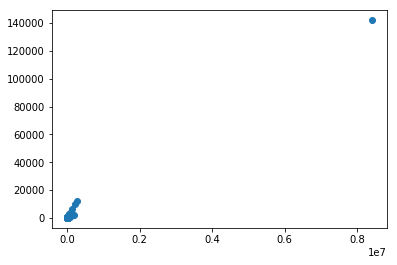

In [12]:
regr = linear_model.LinearRegression()
y = filter_df["Property\ncrime"]
x = filter_df[["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery"]]

plt.scatter(filter_df["Population"], y)

In [13]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(regr.score(x,y))

0.99344854357257


In [15]:
filter_df["Population2"]= filter_df["Population"]**2

In [16]:
filter_df.head()

4,Population,Murder and nonnegligent manslaughter,Robbery,Property crime,Population2
5,1861,0,0,12,3463321
6,2577,0,0,24,6640929
7,2846,0,0,16,8099716
8,97956,1,1,4090,1005443344
9,6388,0,1,223,40806544


In [17]:
regr = linear_model.LinearRegression()
y = filter_df["Property\ncrime"]
x = filter_df[["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery", "Population2"]]


In [18]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(regr.score(x,y))

0.9935839631191373


In [20]:
#𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [21]:
regr.predict(np.array([1000, 1, 1, 1000**2]).reshape(1, -1))

array([755.15610107])

In [22]:
np.array([1000, 1, 1, 1000**2]).shape

(4,)

In [23]:
np.array([1000, 1, 1, 1000**2]).reshape(1, -1).shape

(1, 4)

In [24]:
linear_formula = 'Property\ncrime=Population+ Murder and\nnonnegligent\nmanslaughter+ Robbery+ Population2'


In [25]:
print(linear_formula)

Property
crime=Population+ Murder and
nonnegligent
manslaughter+ Robbery+ Population2


In [26]:
df.params

AttributeError: 'DataFrame' object has no attribute 'params'

In [ ]:
lm = smf.ols(formula=linear_formula, data=df).fit()

In [ ]:
filter_df.conf_int()

In [ ]:
plt.scatter(x, y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
plt.title("One degree of freedom")
plt.show()